This Notebook will examine the concept of the multi-junction STPV system where one has more than 1 PV cell and at least 1 selective thermal emitter.  Let us start by importing the wptherml and stpv libraries and also pyplot:

In [7]:
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from wptherml import stpvlib
from wptherml.datalib import datalib

Now we can define a simple thermal emitter... just a thick (900 nm) piece of Tungsten for now; we can set the temperature to a relatively hot 1500 K.

In [4]:
### dictionary that defines the tungsten emitter at temperature 1500 K
em = {
        'Material_List': ['Air', 'W', 'Air'],
        'Thickness_List': [0, 900e-9,  0],
        'Lambda_List': [400e-9, 6000e-9, 1000],
        'Temperature': 1500
        }

### create the instance of the multilayer
emitter = multilayer(em)
### make sure we compute the thermal emission spectrum of this structure!
emitter.thermal_emission()


  Gradient will be taken with respect to all layers! 


1

Now define two more multilayers that will be the PV cells... top-most can 
be silicon ('Si') and the bottom cell can be InGaAs ('InGaAs').  It is unclear how thick they should be really (we can experiment), so for now let's make them 100 nm each... which is 
probably pretty thin in the grand scheme of things!

In [5]:

pv2 = {
        'Material_List': ['Air', 'InGaAs', 'Air'],
        'Thickness_List': [0, 100e-9,  0],
        'Lambda_List': [400e-9, 6000e-9, 1000]
        }

pv1 = {
        'Material_List': ['Air', 'Si', 'Air'],
        'Thickness_List': [0, 100e-9,  0],
        'Lambda_List': [400e-9, 6000e-9, 1000]
        }





### create the instance called coated_au_film

pv_1 = multilayer(pv1)
pv_2 = multilayer(pv2)


  Gradient will be taken with respect to all layers! 
 Temperature not specified!
 Proceeding with default T = 300 K
  Gradient will be taken with respect to all layers! 
 Temperature not specified!
 Proceeding with default T = 300 K


We defined a new function in stpvlib called 'jsc_multi' that will compute the short circuit current of a Silicon and InGaAs PV in tandem given an incident light source, presumably from the thermal emission of a selective emitter.  The following block of code invokes this function and returns the short-circuit current of the Silicon cell as jsc1 and the InGaAs cell as jsc2

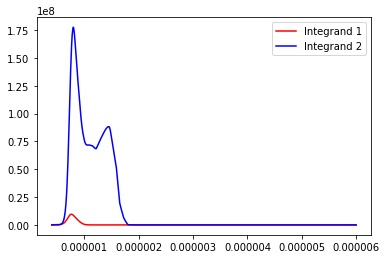

2.0536759223909673
87.01113026477329


In [6]:
jsc1, jsc2 = stpvlib.jsc_multi(emitter.lambda_array, emitter.thermal_emission_array, pv_1.emissivity_array, pv_2.emissivity_array, pv_1.transmissivity_array )
print(jsc1)
print(jsc2)


### Question 1:  How do the short circuit current values vary if the solar spectrum is used instead of the thermal emission spectrum of the W emitter?
Note that the solar spectrum can be obtained from the $datalib$ library and stored in a list called $AM$ by the following single line of code: 
`AM = datalib.AM(emitter.lambda_array)`

### Question 2:  How do the short circuit current values change if the temperature of the W emitter is raised to 2000 K?

### Question 3:  How do the short circuit current values change if the temperature of the W emitter is lowered to 1000 K?


### Question 3:  How do the short circuit current values change when T = 1500 K but the emitter is made from titanium nitride ('TiN') rather than tungsten?

### Excercise:  Plot the blackbody spectrum at 1500 K, the blackbody spectrum at 2000 K, and the solar spectrum against the Spectral Response Curve for silicon and for InGaAs.  Discuss if you think these two PV materials are best suited for the concept of multi-junction STPV.

Note that the blackbody spectrum at 1500 K can be obtained with the following line of code:

`bb_1500 = datalib.BB(emitter.lambda_array, 1500)`

The spectral response of silicon with this line:

`sr_si = datalib.SR_Si(emitter.lambda_array)`

The spectral response of GaSb, which we are using to approximate InGaAs for now, with:

`sr_ingaas = datalib.SR_GaSb(emitter.lambda_array)`
